In [ ]:
## Topic
## data from https://ride.citibikenyc.com/system-data
## 先根据lcoation聚类，然后分析trajectory,

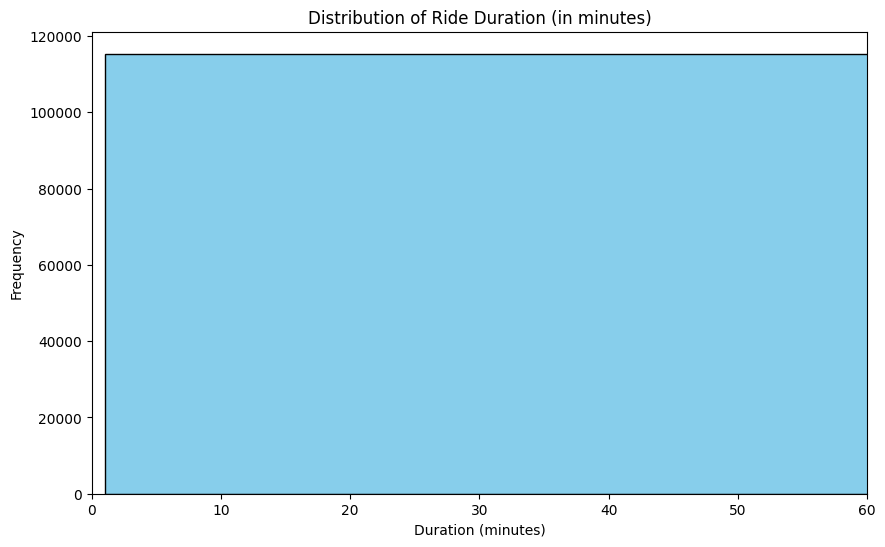

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('JC-202409-citibike-tripdata.csv')

# 转换时间格式
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

# 计算骑行时长
data['ride_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60

# 绘制骑行时长分布图
plt.figure(figsize=(10, 6))
plt.hist(data['ride_duration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Ride Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 60)  # 限制到60分钟以内
plt.show()


/var/folders/ty/cy038g3n0b76wc7182ktv28r0000gn/T/ipykernel_44028/1507171786.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='rideable_type', palette='viridis')


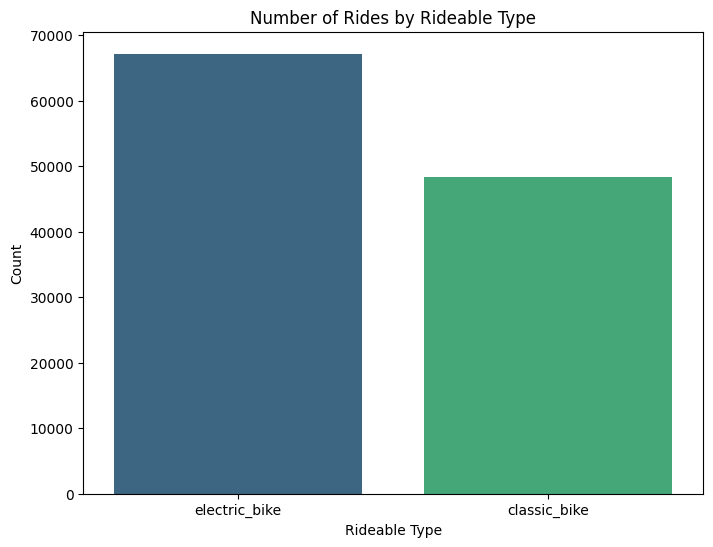

In [2]:
import seaborn as sns

# 绘制骑行类型的柱状图
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='rideable_type', palette='viridis')
plt.title('Number of Rides by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.show()


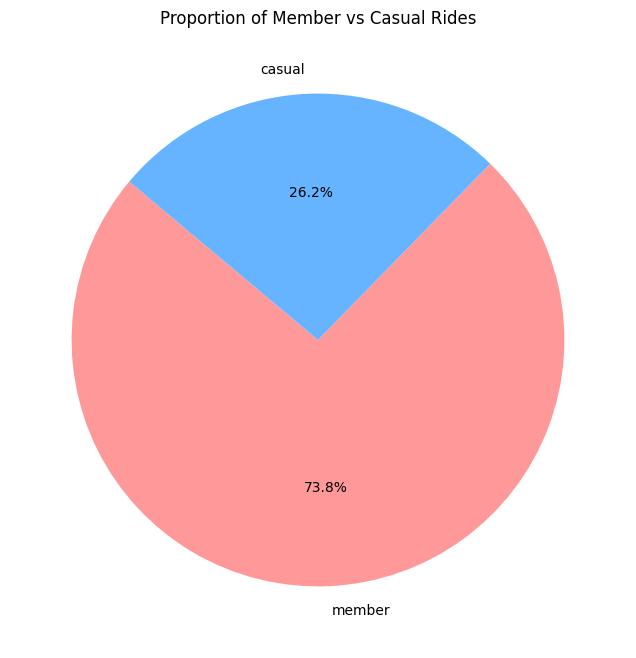

In [3]:
# 绘制会员与非会员的饼图
member_counts = data['member_casual'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(member_counts, labels=member_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Member vs Casual Rides')
plt.show()


/var/folders/ty/cy038g3n0b76wc7182ktv28r0000gn/T/ipykernel_44028/3563140087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=start_station_counts.index, x=start_station_counts.values, palette='coolwarm')


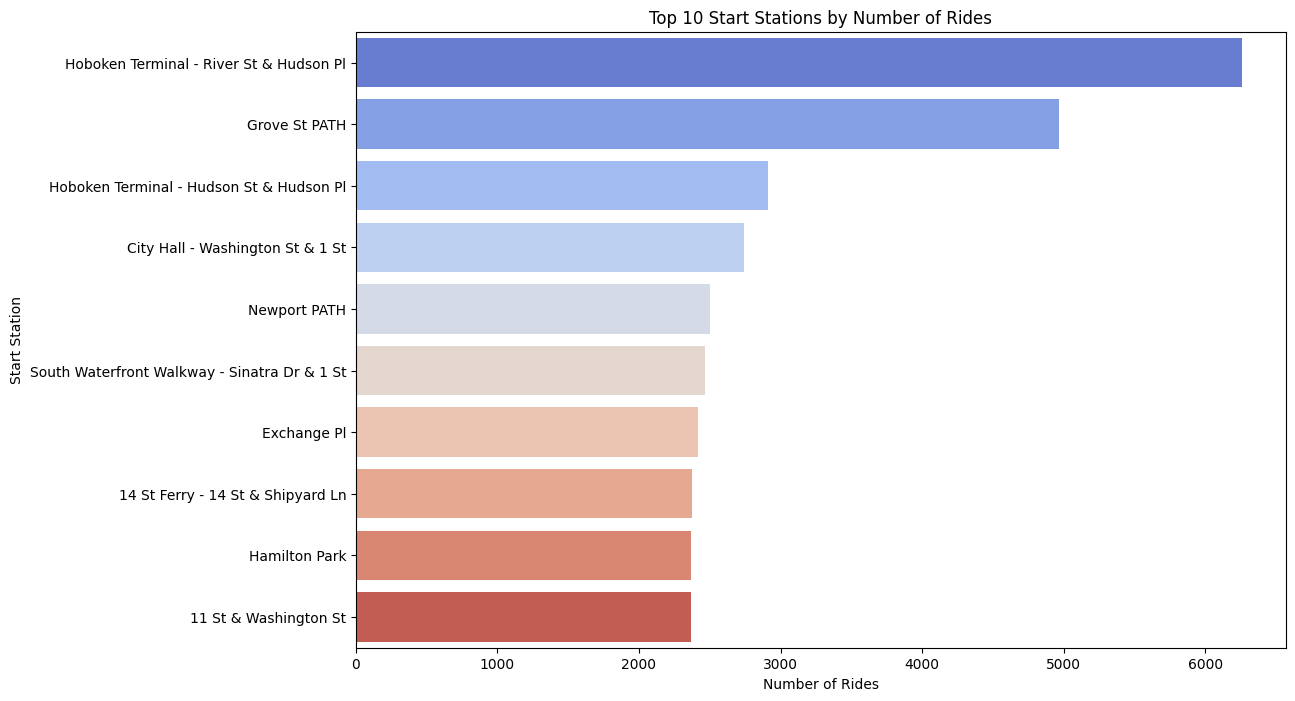

In [4]:
# 计算每个起始站点的骑行数量
start_station_counts = data['start_station_name'].value_counts().head(10)

# 绘制起始站点的柱状图
plt.figure(figsize=(12, 8))
sns.barplot(y=start_station_counts.index, x=start_station_counts.values, palette='coolwarm')
plt.title('Top 10 Start Stations by Number of Rides')
plt.xlabel('Number of Rides')
plt.ylabel('Start Station')
plt.show()


In [5]:
import folium

stations = data[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates()

# 创建地图对象，中心在JC城市
m = folium.Map(location=[stations['start_lat'].mean(), stations['start_lng'].mean()], zoom_start=13)

# 在地图上添加站点标记
for _, row in stations.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=row['start_station_name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# 显示地图
m.save('jc_stations_map.html')
